# Computer Vision Python Quick Starts

This article provides information and code samples to help you quickly get started using the Computer Vision API with Python to accomplish the following tasks:
* [Analyze an image](#AnalyzeImage)
* [Use a domain-specific Model](#DomainSpecificModel)
* [Intelligently generate a thumbnail](#GetThumbnail)
* [Detect and extract printed text from an image](#OCR)
* [Detect and extract handwritten text from an image](#RecognizeText)

To use the Computer Vision API, you need a subscription key. You can get free subscription keys [here](https://docs.microsoft.com/azure/cognitive-services/Computer-vision/Vision-API-How-to-Topics/HowToSubscribe).

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 


[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=VisionAPI.ipynb)


## Analyze an image with Computer Vision API using Python 
<a name="AnalyzeImage"> </a>

With the [Analyze Image method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa), you can extract visual features based on image content. You can upload an image or specify an image URL and choose which features to return, including:
* A detailed list of tags related to the image content.
* A description of image content in a complete sentence.
* The coordinates, gender, and age of any faces contained in the image.
* The ImageType (clip art or a line drawing).
* The dominant color, the accent color, or whether an image is black & white.
* The category defined in this [taxonomy](https://docs.microsoft.com/azure/cognitive-services/computer-vision/category-taxonomy).
* Does the image contain adult or sexually suggestive content?

### Analyze an image 
To begin analyzing images, replace `subscription_key` with a valid API key that you obtained earlier.

In [1]:
import os
os.chdir('../')

In [1]:
subscription_key = 'd79fe8e294c34578b86dc252b71bb3a6'
assert subscription_key

Next, ensure that region in `vision_base_url` corresponds to the one where you generated the API key (`westus`, `westcentralus`, etc.). If you are using a free trial subscription key, you do not need to make any changes here.

In [2]:
vision_base_url = 'https://northeurope.api.cognitive.microsoft.com/vision/v2.0/'

The image analysis URL looks like the following (see REST API docs [here](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa)):
<code>
https://[location].api.cognitive.microsoft.com/vision/v1.0/<b>analyze</b>[?visualFeatures][&details][&language]
</code>

In [3]:
vision_analyze_url = vision_base_url + "analyze"

To begin analyzing an image, set `image_url` to the URL of any image that you want to analyze.

In [103]:
image_url = 'https://s3.amazonaws.com/btoimage/prism-thumbnails/articles/5216-2012222-midfield-basadone.jpg-resize_then_crop-_frame_bg_color_FFF-preserve_ratio_true-gravity_center-w_720-h_480_.jpg'

The following block uses the `requests` library in Python to call out to the Computer Vision `analyze` API and return the results as a JSON object. The API key is passed in via the `headers` dictionary and the types of features to recognize via the `params` dictionary. To see the full list of options that can be used, refer to the [REST API](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa) documentation for image analysis.

In [ ]:
import requests
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories, Description, Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

The `analysis` object contains various fields that describe the image. The most relevant caption for the image can be obtained from the `descriptions` property.

In [105]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

A close up of a bottle and a glass of red wine


The following lines of code display the image and overlay it with the inferred caption.

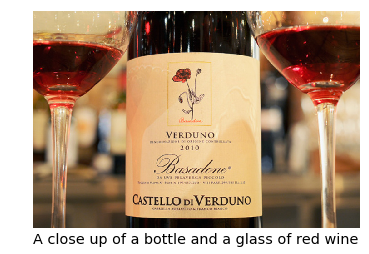

In [106]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

## Use a domain-specific model <a name="DomainSpecificModel"> </a>

A [domain-specific model](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fd)  is a model trained to identify a specific set of objects in an image.  The two domain-specific models that are currently available are _celebrities_ and _landmarks_. 

To view the list of domain-specific models supported, you can make the following request against the service.

In [79]:
model_url = vision_base_url + "models"
headers   = {'Ocp-Apim-Subscription-Key': subscription_key}
models    = requests.get(model_url, headers=headers).json()
[model["name"] for model in models["models"]]

['celebrities', 'landmarks']

### Landmark identification
To begin using the domain-specific model for landmarks, set `image_url` to point to an image to be analyzed.

In [172]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/f/f6/Bunker_Hill_Monument_2005.jpg"

The service end point to analyze images for landmarks can be constructed as follows:

In [173]:
landmark_analyze_url = vision_base_url + "models/landmarks/analyze"
print(landmark_analyze_url)

https://northeurope.api.cognitive.microsoft.com/vision/v2.0/models/landmarks/analyze


The image in `image_url` can now be analyzed for any landmarks. The identified landmark is stored in `landmark_name`.

In [174]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'landmarks'}
data     = {'url': image_url}
response = requests.post(landmark_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis      = response.json()
assert analysis["result"]["landmarks"] is not []

landmark_name = analysis["result"]["landmarks"][0]["name"].capitalize()

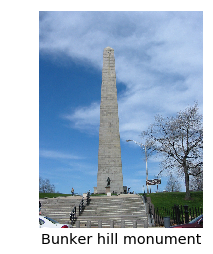

In [175]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(landmark_name, size="x-large", y=-0.1)

### Celebrity identification
Along the same lines, the domain-specific model for identifying celebrities can be invoked as shown next. First set `image_url` to point to the image of a celebrity.

In [16]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Bill_gates_portrait.jpg"

The service end point for detecting celebrity images can be constructed as follows:

In [17]:
celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"
print(celebrity_analyze_url)

https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/models/celebrities/analyze


Next, the image in `image_url` can be analyzed for celebrities

In [18]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'celebrities'}
data     = {'url': image_url}
response = requests.post(celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

In [19]:
print(analysis)

{'result': {'celebrities': [{'faceRectangle': {'top': 123, 'left': 156, 'width': 187, 'height': 187}, 'name': 'Bill Gates', 'confidence': 0.9993845224380493}]}, 'requestId': 'd3eca546-0112-4574-817e-b6c5f43719bf', 'metadata': {'height': 521, 'width': 550, 'format': 'Jpeg'}}


The following lines of code extract the name and bounding box for one of the celebrities found:

In [17]:
assert analysis["result"]["celebrities"] is not []
celebrity_info = analysis["result"]["celebrities"][0]
celebrity_name = celebrity_info["name"]
celebrity_face = celebrity_info["faceRectangle"]

Next, this information can be overlaid on top of the original image using the following lines of code:

In [ ]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.6)
origin = (celebrity_face["left"], celebrity_face["top"])
p      = Rectangle(origin, celebrity_face["width"], celebrity_face["height"], 
                   fill=False, linewidth=2, color='b')
ax.axes.add_patch(p)
plt.text(origin[0], origin[1], celebrity_name, fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

## Get a thumbnail with Computer Vision API
<a name="GetThumbnail"> </a>

Use the [Get Thumbnail method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fb) to crop an image based on its region of interest (ROI) to the height and width you desire. The aspect ratio you set for the thumbnail can be different from the aspect ratio of the input image.

To generate the thumbnail for an image, first set `image_url` to point to its location. 

In [80]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/94/Bloodhound_Puppy.jpg"

The service end point to generate the thumbnail can be constructed as follows:

In [81]:
thumbnail_url = vision_base_url + "generateThumbnail"
print(thumbnail_url)

https://northeurope.api.cognitive.microsoft.com/vision/v1.0/generateThumbnail


Next, a 50-by-50 pixel thumbnail for the image can be generated by calling this service endpoint.

In [82]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'width': '50', 'height': '50','smartCropping': 'true'}
data     = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers, params=params, json=data)
response.raise_for_status()

You can verify that the thumbnail is indeed 50-by-50 pixels using the Python Image Library.

Thumbnail is 50-by-50


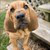

In [83]:
thumbnail = Image.open(BytesIO(response.content))
print("Thumbnail is {0}-by-{1}".format(*thumbnail.size))
thumbnail

## Optical character recognition (OCR) with Computer Vision API <a name="OCR"> </a>

Use the [Optical Character Recognition (OCR) method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc) to detect text in an image and extract recognized characters into a machine-usable character stream.

To illustrate the OCR API, set `image_url` to point to the text to be recognized.

In [166]:
image_url = 'https://s3.amazonaws.com/btoimage/prism-thumbnails/articles/5216-2012222-midfield-basadone.jpg-resize_then_crop-_frame_bg_color_FFF-preserve_ratio_true-gravity_center-w_720-h_480_.jpg'

The service end point for OCR for your region can be constructed as follows:

In [167]:
ocr_url = vision_base_url + "ocr"
print(ocr_url)

https://northeurope.api.cognitive.microsoft.com/vision/v2.0/ocr


Next, you can call into the OCR service to get the text that was recognized along with bounding boxes. In the parameters shown, `"language": "unk"` automatically detects the language in the text and `"detectOrientation": "true"` automatically aligns the image. For more information, see the [REST API documentation](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc).

In [168]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'unk', 'detectOrientation ': 'true'}
data     = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

The word bounding boxes and text from the results of analysis can be extracted using the following lines of code:

In [169]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '293,268,107,15', 'text': 'VERDUNO'},
 {'boundingBox': '324,298,42,11', 'text': '2010'},
 {'boundingBox': '312,366,58,7', 'text': 'rttAVtRGA'},
 {'boundingBox': '220,406,106,25', 'text': 'CASTELLO'},
 {'boundingBox': '332,408,148,23', 'text': 'DIVERDUNO'}]

Finally, the recognized text can be overlaid on top of the original image using the `matplotlib` library.

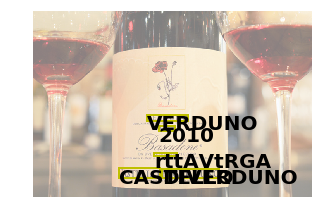

In [170]:
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

## Text recognition with Computer Vision API <a name="RecognizeText"> </a>

Use the [RecognizeText method](https://ocr.portal.azure-api.net/docs/services/56f91f2d778daf23d8ec6739/operations/587f2c6a154055056008f200) to detect handwritten or printed text in an image and extract recognized characters into a machine-usable character stream.

Set `image_url` to point to the image to be recognized.

In [147]:
image_url = 'https://s3.amazonaws.com/btoimage/prism-thumbnails/articles/5216-2012222-midfield-basadone.jpg-resize_then_crop-_frame_bg_color_FFF-preserve_ratio_true-gravity_center-w_720-h_480_.jpg'

The service end point for the text recognition service can be constructed as follows:

In [148]:
text_recognition_url = vision_base_url + "RecognizeText"
print(text_recognition_url)

https://northeurope.api.cognitive.microsoft.com/vision/v2.0/RecognizeText


The handwritten text recognition service can be used to recognize the text in the image. In the `params` dictionary, set `handwriting` to `false` to recognize only printed text.

In [149]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'mode' : 'Printed'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

The text recognition service does not return the recognized text by itself. Instead, it returns immediately with an "Operation Location" URL in the response header that must be polled to get the result of the operation.

In [150]:
operation_url = response.headers["Operation-Location"]

After obtaining the `operation_url`, you can query it for the analyzed text. The following lines of code implement a polling loop in order to wait for the operation to complete. Notice that the polling is done via an HTTP `GET` method instead of `POST`.

In [5]:
analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)

NameError: name 'response' is not defined

Next, the recognized text along with the bounding boxes can be extracted as shown in the following line of code. An important point to note is that the handwritten text recognition API returns bounding boxes as **polygons** instead of **rectangles**. Each polygon is _p_ is defined by its vertices specified using the following convention:

<i>p</i> = [<i>x</i><sub>1</sub>, <i>y</i><sub>1</sub>, <i>x</i><sub>2</sub>, <i>y</i><sub>2</sub>, ..., <i>x</i><sub>N</sub>, <i>y</i><sub>N</sub>]

In [158]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

Finally, the recognized text can be overlaid on top of the original image using the extracted polygon information. Notice that `matplotlib` requires the vertices to be specified as a list of tuples of the form:

<i>p</i> = [(<i>x</i><sub>1</sub>, <i>y</i><sub>1</sub>), (<i>x</i><sub>2</sub>, <i>y</i><sub>2</sub>), ..., (<i>x</i><sub>N</sub>, <i>y</i><sub>N</sub>)]

and the post-processing code transforms the polygon data returned by the service into the form required by `matplotlib`.

In [161]:
analysis["recognitionResult"]

{'lines': [{'boundingBox': [290, 267, 403, 266, 403, 282, 291, 282],
   'text': 'VERDUNO',
   'words': [{'boundingBox': [294, 268, 397, 267, 396, 283, 294, 283],
     'text': 'VERDUNO'}]},
  {'boundingBox': [256, 284, 435, 283, 436, 294, 257, 295],
   'text': 'DINOMINAZIONE DI ORIGINE CONTROLEATA',
   'words': [{'boundingBox': [256, 287, 323, 285, 323, 294, 256, 296],
     'text': 'DINOMINAZIONE'},
    {'boundingBox': [325, 285, 337, 285, 337, 293, 326, 294], 'text': 'DI'},
    {'boundingBox': [339, 285, 376, 285, 376, 294, 340, 293],
     'text': 'ORIGINE'},
    {'boundingBox': [380, 285, 436, 286, 435, 295, 380, 294],
     'text': 'CONTROLEATA'}]},
  {'boundingBox': [319, 296, 368, 297, 367, 310, 318, 309],
   'text': '2010',
   'words': [{'boundingBox': [323, 298, 365, 297, 365, 311, 324, 310],
     'text': '2010'}]},
  {'boundingBox': [266, 312, 437, 322, 434, 367, 264, 358],
   'text': 'Basadone',
   'words': [{'boundingBox': [294, 316, 436, 329, 435, 363, 290, 360],
     'text': 

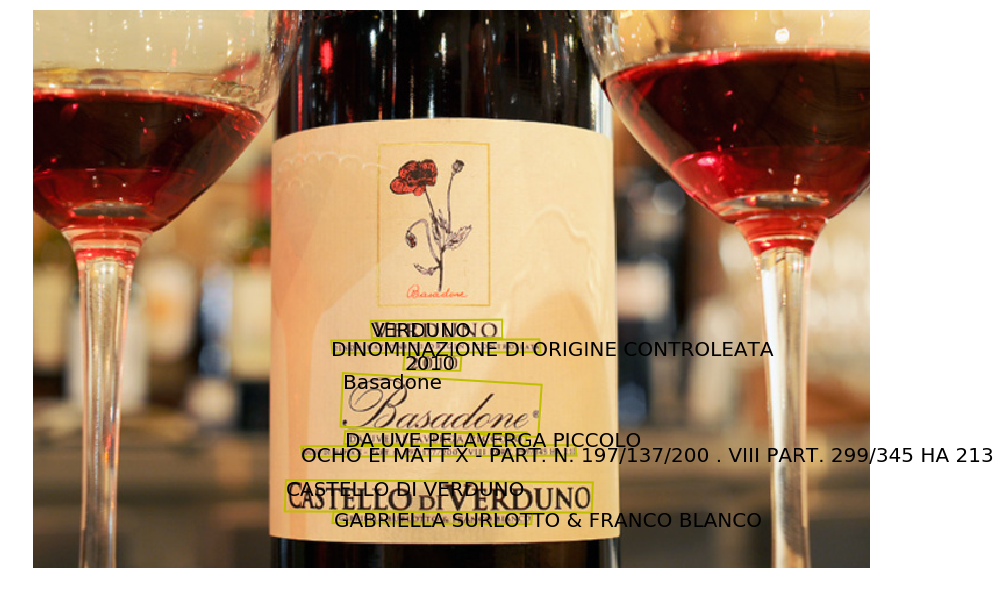

In [159]:
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

## Analyze an image stored on disk
The Computer Vision REST APIs don't just accept URLs to publically accessible images. They can also be provided the image to be analyzed as part of the HTTP body. For mode details of this feature, see the documentation [here](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa). 

The code in this section uses this feature to analyze a sample image on disk. The primary difference between passing in an image URL vs. image data is that the header to the request must contain an entry of the form:
```py
{"Content-Type": "application/octet-stream"}
```
and the binary image data must be passed in via the `data` parameter to `requests.post` as opposed to the `json` parameter.

First, download a sample image from the [Computer Vision API](https://azure.microsoft.com/services/cognitive-services/computer-vision/) page to the local file system and make `image_path` point to it.

In [35]:
%%bash
mkdir -p images
curl -Ls https://aka.ms/csnb-house-yard -o images/house_yard.jpg

In [36]:
image_path = "images/house_yard.jpg"

Then, read it into a byte array and send it to the Vision service to be analyzed.

In [37]:
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream"}
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(vision_analyze_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()

analysis      = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A large lawn in front of a house'

As before, the caption can be easily overlaid on the image. Notice that since the image is already available locally, the process is slightly shorter.

In [139]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'd79fe8e294c34578b86dc252b71bb3a6',
}

params = urllib.parse.urlencode({
    # Request parameters
    'mode': 'Printed',
})

try:
    conn = http.client.HTTPSConnection('northeurope.api.cognitive.microsoft.com')
    conn.request("POST", "/vision/v2.0/recognizeText?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b'{"error":{"code":"BadArgument","message":"Invalid input."}}'
